# Fitting a line with Tensorflow

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Generate fake data

Data will look like:<br>
> $ y=W*x+b $<br>

with $ W=2 $ and $ b=3 $ plus some random gaussian noise.

In [2]:
learning_rate = 0.01
N = 100
tol = 0.00001

# Our X values will be equally distributed between -10 and 10
train_X = np.linspace(-10, 10, N)

# Generate a straight line with some gaussian noise
train_Y = 2*train_X + 3 + np.random.randn(N) 

### Computational Graph

In [3]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")
y = tf.add(tf.multiply(X, W), b)

# Mean Quadratic error
cost = tf.reduce_mean(tf.pow(y-Y, 2))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

### Train the model - Version 1

In [4]:
with tf.Session() as sess:
    sess.run(init)
    
    step = 0
    cost_val = 4
    
    # Continue training until 
    while cost_val > 1.1:
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})

        cost_val, W_val, b_val = sess.run([cost, W, b], feed_dict={X: train_X, Y:train_Y})

        if step%10 == 0:
            print("step", step, "cost", cost_val, "w", W_val, "b", b_val)

        step += 1

step 0 cost 8.09405 w 1.6862 b 0.996921
step 10 cost 3.53835 w 1.99172 b 1.36983
step 20 cost 2.61616 w 1.99173 b 1.67452
step 30 cost 2.0005 w 1.99173 b 1.92348
step 40 cost 1.58948 w 1.99173 b 2.1269
step 50 cost 1.31508 w 1.99173 b 2.2931
step 60 cost 1.13188 w 1.99173 b 2.4289


### Visualize results

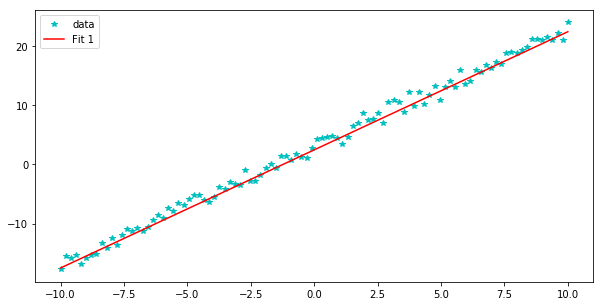

In [5]:
y1 = W_val*train_X+b_val
plt.figure(figsize=(10,5))
plt.plot(train_X, train_Y, 'c*')
plt.plot(train_X, y1, 'r-')
plt.legend(["data", "Fit 1"])
plt.show()

### Train the model - Version 2

In [6]:
with tf.Session() as sess:
    sess.run(init)
    
    step = 0
    cost_val = 4
    
    old_W = 1000
    old_b = 1000
    norm = 1000
    # Continue training until 
    while norm > tol:
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})

        cost_val, W_val, b_val = sess.run([cost, W, b], feed_dict={X: train_X, Y:train_Y})

        if step%10 == 0:
            print("step", step, "cost", cost_val, "w", W_val, "b", b_val, "norm", norm)
        
        norm = abs(old_W-W_val)+abs(old_b-b_val)
        old_W, old_b = W_val, b_val
        step += 1

step 0 cost 8.09405 w 1.6862 b 0.996921 norm 1000
step 10 cost 3.53835 w 1.99172 b 1.36983 norm 0.0347095
step 20 cost 2.61616 w 1.99173 b 1.67452 norm 0.0283415
step 30 cost 2.0005 w 1.99173 b 1.92348 norm 0.0231571
step 40 cost 1.58948 w 1.99173 b 2.1269 norm 0.0189211
step 50 cost 1.31508 w 1.99173 b 2.2931 norm 0.0154598
step 60 cost 1.13188 w 1.99173 b 2.4289 norm 0.0126319
step 70 cost 1.00958 w 1.99173 b 2.53986 norm 0.0103211
step 80 cost 0.927935 w 1.99173 b 2.63053 norm 0.0084331
step 90 cost 0.873426 w 1.99173 b 2.7046 norm 0.00689054
step 100 cost 0.837035 w 1.99173 b 2.76513 norm 0.00563002
step 110 cost 0.81274 w 1.99173 b 2.81459 norm 0.00460005
step 120 cost 0.79652 w 1.99173 b 2.855 norm 0.00375867
step 130 cost 0.785692 w 1.99173 b 2.88801 norm 0.00307107
step 140 cost 0.778463 w 1.99173 b 2.91499 norm 0.00250936
step 150 cost 0.773637 w 1.99173 b 2.93703 norm 0.00205016
step 160 cost 0.770415 w 1.99173 b 2.95504 norm 0.00167513
step 170 cost 0.768264 w 1.99173 b 2.96

### Compare the two versions

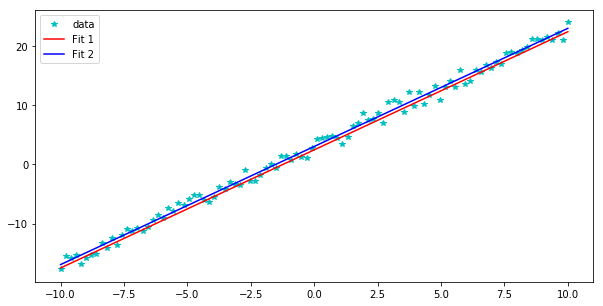

In [7]:
y2 = W_val*train_X+b_val
plt.figure(figsize=(10,5))
plt.plot(train_X, train_Y, 'c*')
plt.plot(train_X, y1, 'r-')
plt.plot(train_X, y2, 'b-')
plt.legend(["data", "Fit 1", "Fit 2"])
plt.show()